In [1]:
import pandas as pd
import numpy as np
import glob
import os
#For ploting 
import  matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 8
matplotlib.rcParams['ytick.labelsize'] = 8
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import kendalltau
#from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
def outliersImputation(data,feature):
    print(feature)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    data[feature] = np.where(data[feature] < lower,lower,
                     np.where(data[feature] > upper,upper,data[feature]))

In [3]:
#USE TO MERGE ALL FILES TOGETHER
path = r'C:\Users\Dr.Abbas\Desktop\bubble\New Folder' # use your path
all_files = glob.glob(path + "/*.xlsx")

li = []
data = pd.DataFrame()

for filename in all_files:
    print(filename)
    path1, filename1 = os.path.split(filename)
    root, ext = os.path.splitext(filename1)
    df = pd.read_excel(filename,usecols=['Gravity Ratio', 'Acceleration'])
    df.columns = ['GO_'+ root, 'SI_'+ root]
    df = df.interpolate(method ='linear', limit_direction ='forward')
    #a = df.columns[i]
    outliersImputation(df,df.columns[1] )
    #df = df[10000:17000]
    li.append(df)

data = pd.concat(li, axis=1, ignore_index=False)
data = data.reset_index(drop = True)


C:\Users\Dr.Abbas\Desktop\bubble\New Folder\100.xlsx
SI_100
C:\Users\Dr.Abbas\Desktop\bubble\New Folder\150.xlsx
SI_150
C:\Users\Dr.Abbas\Desktop\bubble\New Folder\20.xlsx
SI_20
C:\Users\Dr.Abbas\Desktop\bubble\New Folder\200.xlsx
SI_200
C:\Users\Dr.Abbas\Desktop\bubble\New Folder\250.xlsx
SI_250
C:\Users\Dr.Abbas\Desktop\bubble\New Folder\50.xlsx
SI_50
C:\Users\Dr.Abbas\Desktop\bubble\New Folder\70.xlsx
SI_70


In [122]:
#data.to_csv('datafilter_indent.csv', sep=',') # relative position

In [4]:
data[5000:9000].isnull().sum().head(20)


GO_100      1
SI_100      0
GO_150      2
SI_150      0
GO_20     336
SI_20       0
GO_200      2
SI_200      0
GO_250      2
SI_250      0
GO_50       0
SI_50       0
GO_70       2
SI_70       0
dtype: int64

In [3]:
dd = data[5000:9000]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
df = dd #data1.drop(['Date'],axis=1)
outliers = df[(df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))]
outliers.count()

NameError: name 'data' is not defined

In [6]:
l = []
vv = []
datades = pd.DataFrame()
for i in range(1,len(data.columns),2):
    #print(i)
    a = data.columns[i]
    print(a)
    val = data[a][6000:10000]
    rms = np.sqrt(np.mean(val**2))
    v = val.describe()
    l.append(v)
    vv.append(rms)
              
datades = pd.concat(l, axis=1, ignore_index=False)
datades.loc[len(datades)] = vv
datades = datades.rename(index={8:"rms"})


SI_100
SI_150
SI_20
SI_200
SI_250
SI_50
SI_70


In [7]:
datades = datades.iloc[:,[2,5,6,0,1,3,4]]

In [130]:
#datades.to_csv('datadesindent.csv', sep=',') # relative position

In [8]:
datades.head(10)

,SI_20,SI_50,SI_70,SI_100,SI_150,SI_200,SI_250
count,4000.000000,4000.000000,3301.000000,3999.000000,3185.000000,3301.000000,3300.000000
mean,0.982913,0.131601,0.160687,0.070147,0.161087,0.160687,0.158892
std,1.522467,2.806817,4.529942,7.077637,4.527790,4.529942,4.529455
min,-1.618650,-8.534700,-9.319500,-13.047300,-9.319500,-9.319500,-9.319500
25%,-0.392400,-1.962000,-2.648700,-6.180300,-2.648700,-2.648700,-2.648700
50%,1.471500,0.098100,-0.784800,-0.098100,-0.784800,-0.784800,-0.784800
75%,2.550600,2.256300,3.924000,7.946100,3.924000,3.924000,3.924000
max,5.052150,8.730900,14.028300,10.300500,14.175450,14.028300,14.028300
rms,1.812027,2.809550,4.532105,7.077100,4.529944,4.532105,4.531555


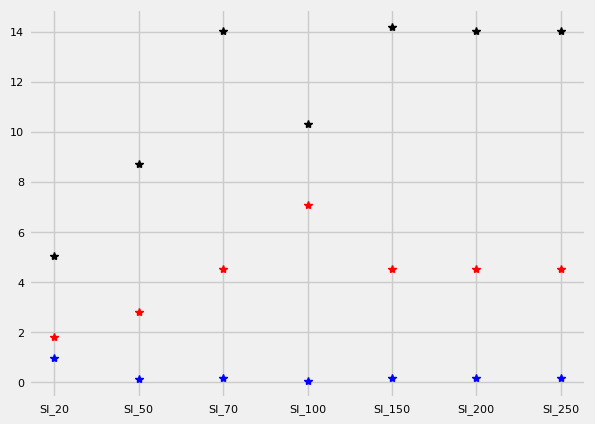

In [27]:
#plotting
dfa = datades
#rms = np.sqrt(np.mean(y**2))
plt.plot(dfa.columns,dfa.loc['mean'],'*b')
#plt.plot(dfa.columns,dfa.loc['min'],'*b')
plt.plot(dfa.columns,dfa.loc['max'],'*k')
plt.plot(dfa.columns,dfa.loc['rms'],'*r')

In [2]:
from scipy.fftpack import fft, ifft
#read csv to append the data and reset index
data = pd.read_csv('datafilter_indent.csv',sep=',')
data = data.drop(['Unnamed: 0'], axis = 1)

In [73]:
# X = fft(x)
# N = len(X)
# n = np.arange(N)
# T = N/sr
# freq = n/T 

In [3]:
def extract_fft_peak_frequency(data, sampling_rate):
    fft_data = np.fft.fft(data)
    N = len(fft_data)
    n = np.arange(N)
    T = N/sampling_rate
    freq = n/T 

    
    freqs = np.fft.fftfreq(len(data))
    
    peak_coefficient = np.argmax(np.abs(fft_data))
    peak_freq = freqs[peak_coefficient]
    peak_ampl = fft_data[peak_coefficient]
    a = abs(peak_freq * sampling_rate)
    b= abs(peak_ampl)
    
    
    
    all_coefficient = (np.abs(fft_data) > 1000)
    all_freq = freqs[all_coefficient]
    all_ampl = fft_data[all_coefficient]
    


    c = abs(all_freq * sampling_rate)
#     c = list(np.unique(c))
    
    d = abs(all_ampl)
#     d = list(np.unique(d))
    
#     for i in range(1, (abs (len(a_amp) - len(a_fre)))+1):
#         del d[-i]
    
    return [a,b,c,d,N,freq,fft_data,T]



In [8]:
#Signal and filtering using butterworth
from scipy import signal

sr = 500
s= 4000
e=8000
x = data['SI_20'][s:e].values
[p_fre,p_amp,a_fre,a_amp,N,freq,X,T]= extract_fft_peak_frequency(x, sr)
rms_ori = np.sqrt(np.mean(x**2))

# sos = signal.butter(2, p_fre, 'hp', fs=sr, output='sos')
# filtered = signal.sosfilt(sos, x)
# rms_filt = np.sqrt(np.mean(filtered**2))
# [f_p_fre,f_p_amp,f_a_fre,f_a_amp,f_N,f_freq,f_X]= extract_fft_peak_frequency(filtered, sr)

print(a_fre)
print(a_amp)
print(p_fre)
print(p_amp)
# print(T)

[19.5   19.625 19.75  19.75  19.625 19.5  ]
[1366.99187174 1816.32912885 1149.98247205 1149.98247205 1816.32912885
 1366.99187174]
19.625
1816.3291288544801


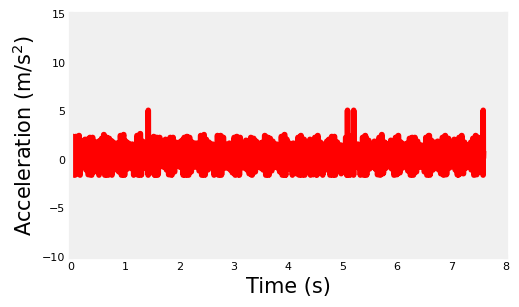

In [9]:
# for raw data Get the one-sided specturm -->
n_oneside = N//2
# get the one side frequency -->
f_oneside = freq[:n_oneside]

 # for filtered data Get the one-sided specturm
# f_n_oneside = f_N//2
# # get the one side frequency
# f_f_oneside = f_freq[:f_n_oneside] -->

t = [i for i in np.arange(0,T,float(1/sr))]
array = np.array(t)
array = array - 0.4


fig = plt.figure(figsize=(5,3),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size':25})
plt.rc('axes', labelsize=15)  
ax = fig.add_subplot(111)
ax.plot(array,x, '-r')
plt.xlim(0,T)
plt.ylim(-10,15)
#ax.set_title("Oscillator Output")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Acceleration ($\mathregular{m/s^2}$)")
ax.grid(False)

#ax.legend(loc=1)
fig.savefig('Basic.png', dpi=300, bbox_inches="tight")
#t = t-0.1 

C:\Users\Dr.Abbas\AppData\Local\Temp\ipykernel_14156\1768995304.py:5: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b',markerfmt=" ", basefmt="b")


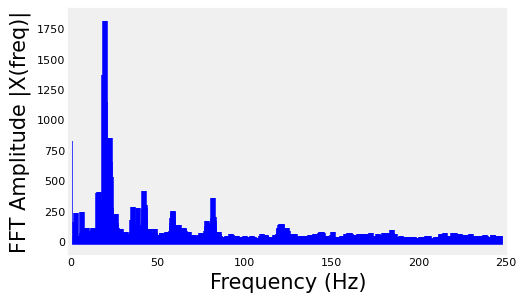

In [10]:
fig = plt.figure(figsize=(5,3),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size':15})
plt.rc('axes', labelsize=15)  
plt.subplot(111)
plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b',markerfmt=" ", basefmt="b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,250)
plt.grid(False)


#ax.legend(loc=1)
fig.savefig('fft.png', dpi=300, bbox_inches="tight")
#t = t-0.1 

In [40]:
len(t)

4000

In [12]:
print(rms_filt)
print(rms_ori)

6.768491094351094
9.35337378487995


In [121]:
[p_fre,p_amp,a_fre,a_amp]= extract_peak_frequency(filtered, sr)
print(p_fre)
print(p_amp)
print(a_fre)
print(a_amp)

3.125
28247.34441060707
[ 2.375  2.5    2.625  2.75   2.875  3.     3.125  3.25   3.375  3.5
  3.625  3.75   3.875  4.     4.125  4.25   4.875  6.125  6.25   6.375
  6.625  6.75   9.25   9.375  9.5    9.625  9.75  12.625 15.75  15.875
 18.    19.    20.5   20.625 24.125 24.25  24.375 24.5   26.875 27.25
 27.375 27.5   27.625 30.125 30.25  30.625 30.75  30.875 33.375 33.625
 33.75  33.875 34.    36.375 36.75  36.875 37.125 39.75  39.875 40.
 40.125 40.25  40.375 40.625 42.75  46.25  46.625 47.    54.5   54.75
 60.625 60.75  60.875 67.125 67.125 60.875 60.75  60.625 54.75  54.5
 47.    46.625 46.25  42.75  40.625 40.375 40.25  40.125 40.    39.875
 39.75  37.125 36.875 36.75  36.375 34.    33.875 33.75  33.625 33.375
 30.875 30.75  30.625 30.25  30.125 27.625 27.5   27.375 27.25  26.875
 24.5   24.375 24.25  24.125 20.625 20.5   19.    18.    15.875 15.75
 12.625  9.75   9.625  9.5    9.375  9.25   6.75   6.625  6.375  6.25
  6.125  4.875  4.25   4.125  4.     3.875  3.75   3.625  3.5   

C:\Users\Dr.Abbas\AppData\Local\Temp\ipykernel_12940\11663877.py:18: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b',markerfmt=" ", basefmt="-b")


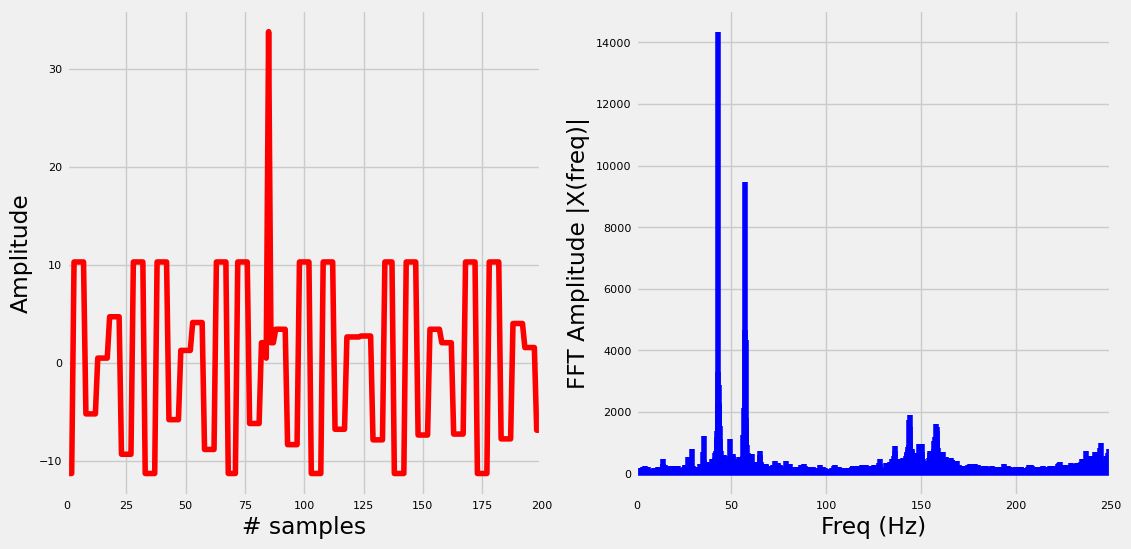

In [77]:
#Plotting the fft and signal

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]


plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('# samples')
#plt.tight_layout()
plt.xlim(0,200)

plt.subplot(122)
plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b',markerfmt=" ", basefmt="-b")
#plt.stem(freq, np.abs(X), 'b',markerfmt=" ", basefmt="-b")
#plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,250)
plt.show()



C:\Users\Dr.Abbas\AppData\Local\Temp\ipykernel_12940\2571124106.py:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b',markerfmt=" ", basefmt="-b")
C:\Users\Dr.Abbas\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


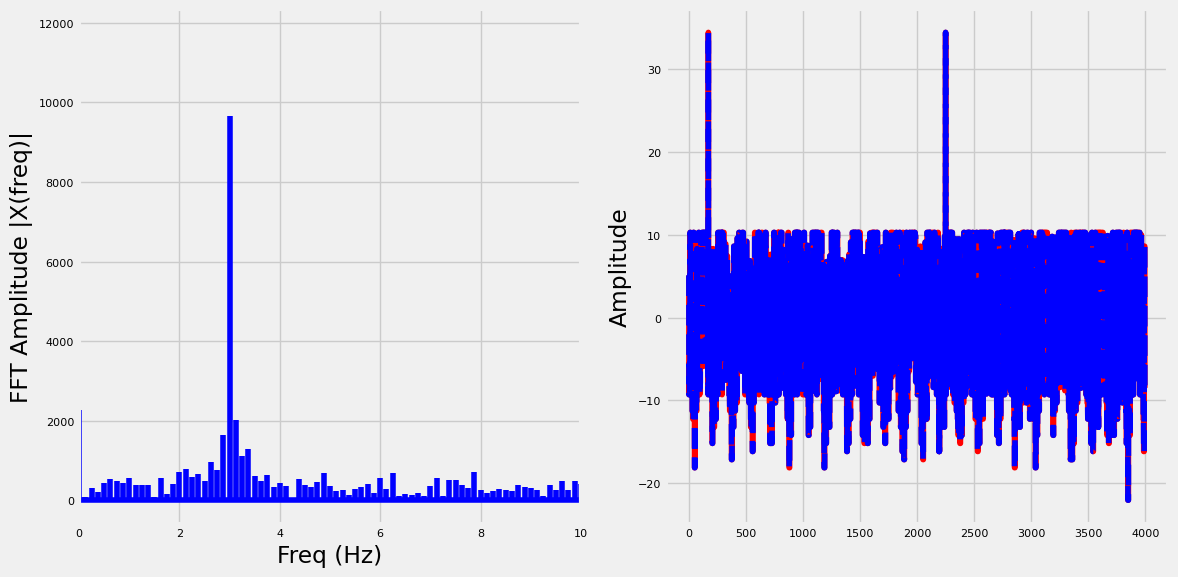

In [60]:
#Ploting the signals
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(X), 'b',markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,10)

plt.subplot(122)
plt.plot(ifft(X), 'r')
plt.plot (x,'--b')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

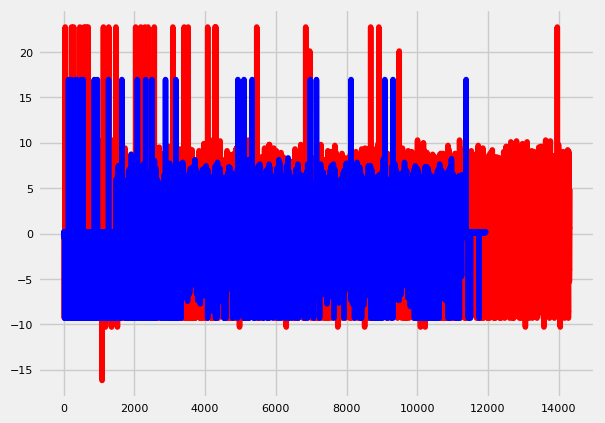

In [175]:
s = 0
e = 25000
plt.plot(data['SI_400'][s:e],'r')
plt.plot(data['SI_450'][s:e],'b')

